## <font color ="#fa8231">Proyecto final: Prediccion de gasto en vinos

## <font color ="#fa8231">Fases

1. Datos y planteamiento
2. An√°lisis exploratorio
3. Modelado predictivo

###  <font color ="#fa8231"> Contexto del dataset y diccionario de datos

**Context**
 **Problem Statement**
 
Customer Personality Analysis is a detailed analysis of a company‚Äôs ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company‚Äôs database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
 
 **Content**
 **Attributes**
 
 **People**
 
 - ID: Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if customer complained in the last 2 years, 0 otherwise
 
 
 **Products**
 
 
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years
 
 
 **Promotion**
 
 
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
 
 
 **Medio de compra**
 
 
 - NumWebPurchases: Number of purchases made through the company‚Äôs web site
 - NumCatalogPurchases: Number of purchases made using a catalogue
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company‚Äôs web site in the last month
 
  **Data Source: https://www.kaggle.com/imakash3011/customer-personality-analysis**

In [1]:
#JB
# Manejo de datos
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(["ggplot","seaborn-white"])
#plt.style.use(['fivethirtyeight','seaborn-poster'])
sns.set_style('whitegrid')

# Estad√≠stica
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librerias adicionales
from base_code.describe_df import data_description
from base_code.explore import remove_outliers,find_upper_outliers, find_lower_outliers,get_record#, create_boxplot
#from base_code.feature_selection import variable_normalization,select_kbest
from base_code.modeling import manual_model,final_model,linear_regression,random_forest_regressor

# Librerias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn import metrics

# Selecci√≥n de modelos
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [2]:
# Crear dataframe y describir datos de entrada
df = data_description("data/marketing_campaign.csv","\t")


****** Rename Columns: ******

Original column names:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Renamed column names:
 Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accep


****** Describe: ******




****** Nulls by column: ******

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_costcontact             0
z_revenue                 0
response                  0
dtype: int64

****** Info: ******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column  


****** Columns correlation: ******




****** Total unique values by column: ******

Number of unique values for column id:  2240 | Percent = 100.0%
Number of unique values for column year_birth:  59 | Percent = 2.63%
Number of unique values for column education:  5 | Percent = 0.22%
Number of unique values for column marital_status:  8 | Percent = 0.36%
Number of unique values for column income:  1974 | Percent = 88.12%
Number of unique values for column kidhome:  3 | Percent = 0.13%
Number of unique values for column teenhome:  3 | Percent = 0.13%
Number of unique values for column dt_customer:  663 | Percent = 29.6%
Number of unique values for column recency:  100 | Percent = 4.46%
Number of unique values for column mnt_wines:  776 | Percent = 34.64%
Number of unique values for column mnt_fruits:  158 | Percent = 7.05%
Number of unique values for column mnt_meat_products:  558 | Percent = 24.91%
Number of unique values for column mnt_fish_products:  182 | Percent = 8.12%
Number of unique values for column mnt_sweet_prod

## Limpieza

In [3]:
# Revisar el porcentaje que representan los 24 nulos de la columna "income"
df.isnull().sum() / len(df)

id                       0.000000
year_birth               0.000000
education                0.000000
marital_status           0.000000
income                   0.010714
kidhome                  0.000000
teenhome                 0.000000
dt_customer              0.000000
recency                  0.000000
mnt_wines                0.000000
mnt_fruits               0.000000
mnt_meat_products        0.000000
mnt_fish_products        0.000000
mnt_sweet_products       0.000000
mnt_gold_prods           0.000000
num_deals_purchases      0.000000
num_web_purchases        0.000000
num_catalog_purchases    0.000000
num_store_purchases      0.000000
num_web_visits_month     0.000000
accepted_cmp3            0.000000
accepted_cmp4            0.000000
accepted_cmp5            0.000000
accepted_cmp1            0.000000
accepted_cmp2            0.000000
complain                 0.000000
z_costcontact            0.000000
z_revenue                0.000000
response                 0.000000
dtype: float64

In [4]:
# Eliminar nulos
df.dropna(inplace=True)
df.isnull().sum()

id                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
z_costcontact            0
z_revenue                0
response                 0
dtype: int64

In [5]:
# Constantes
# Verificamos si tenemos alg√∫n campo donde todos los valores son iguales.
filtro = df.nunique() == 1
df.loc[:,filtro]

z_costcontact  z_revenue
0                 3         11
1                 3         11
2                 3         11
3                 3         11
4                 3         11
...             ...        ...
2235              3         11
2236              3         11
2237              3         11
2238              3         11
2239              3         11

[2216 rows x 2 columns]

In [6]:
# Eliminamos las columnas z_costcontact Y z_revenue porque tienen un valor constante.
df.drop(columns = ['z_costcontact', 'z_revenue'], inplace = True)

In [7]:
# Corregimos tipos de datos (strings, ints, etc)
df.dtypes

id                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
mnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_store_purchases        int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
response                   int64
dtype: object

In [8]:
# Cambiamos el tipo de dato de la variable dt_customer a fecha
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')
df.dtypes

id                                int64
year_birth                        int64
education                        object
marital_status                   object
income                          float64
kidhome                           int64
teenhome                          int64
dt_customer              datetime64[ns]
recency                           int64
mnt_wines                         int64
mnt_fruits                        int64
mnt_meat_products                 int64
mnt_fish_products                 int64
mnt_sweet_products                int64
mnt_gold_prods                    int64
num_deals_purchases               int64
num_web_purchases                 int64
num_catalog_purchases             int64
num_store_purchases               int64
num_web_visits_month              int64
accepted_cmp3                     int64
accepted_cmp4                     int64
accepted_cmp5                     int64
accepted_cmp1                     int64
accepted_cmp2                     int64


In [9]:
# Revisamos las columnas que tengan 2 valores
filtro = df.nunique() == 2
df.loc[:,filtro]

accepted_cmp3  accepted_cmp4  accepted_cmp5  accepted_cmp1  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2235              0              0              0              0   
2236              0              0              0              1   
2237              0              1              0              0   
2238              0              0              0              0   
2239              0              0              0              0   

      accepted_cmp2  complain  response  
0                 0         0         1  
1                 0         0         0  
2                 0         0         0  
3                 0         0         0  
4                 0         0         0  
...             ...       ...       ...  
2235              0         0         0  
2236              0         0         0  
2237              0         0         0  
2238              0         0         0  
2239              0         0         1  

[2216 rows x 7 columns]

In [10]:
# Cambiamos el tipo a booleano.
df['accepted_cmp3'] = df['accepted_cmp3'].astype('bool')
df['accepted_cmp4'] = df['accepted_cmp4'].astype('bool')
df['accepted_cmp5'] = df['accepted_cmp5'].astype('bool')
df['accepted_cmp1'] = df['accepted_cmp1'].astype('bool')
df['accepted_cmp2'] = df['accepted_cmp2'].astype('bool')

df['complain'] = df['complain'].astype('bool')
df['response'] = df['response'].astype('bool')

df.dtypes

id                                int64
year_birth                        int64
education                        object
marital_status                   object
income                          float64
kidhome                           int64
teenhome                          int64
dt_customer              datetime64[ns]
recency                           int64
mnt_wines                         int64
mnt_fruits                        int64
mnt_meat_products                 int64
mnt_fish_products                 int64
mnt_sweet_products                int64
mnt_gold_prods                    int64
num_deals_purchases               int64
num_web_purchases                 int64
num_catalog_purchases             int64
num_store_purchases               int64
num_web_visits_month              int64
accepted_cmp3                      bool
accepted_cmp4                      bool
accepted_cmp5                      bool
accepted_cmp1                      bool
accepted_cmp2                      bool


In [11]:
# No hay duplicados
df.duplicated().sum()

0

## EDA

**Variables de inter√©s:**
- **year_birht -->** generation, client_ age
- **income**
- **kidhome y teenhome -->** children, total_children

- **mnt_wines**

Elegimos estas variables porque creemos que estas caracter√≠sticas del cliente pueden influir en su gasto en vinos y podremos utilizarlas como variables de entrada para nuestro modelo.

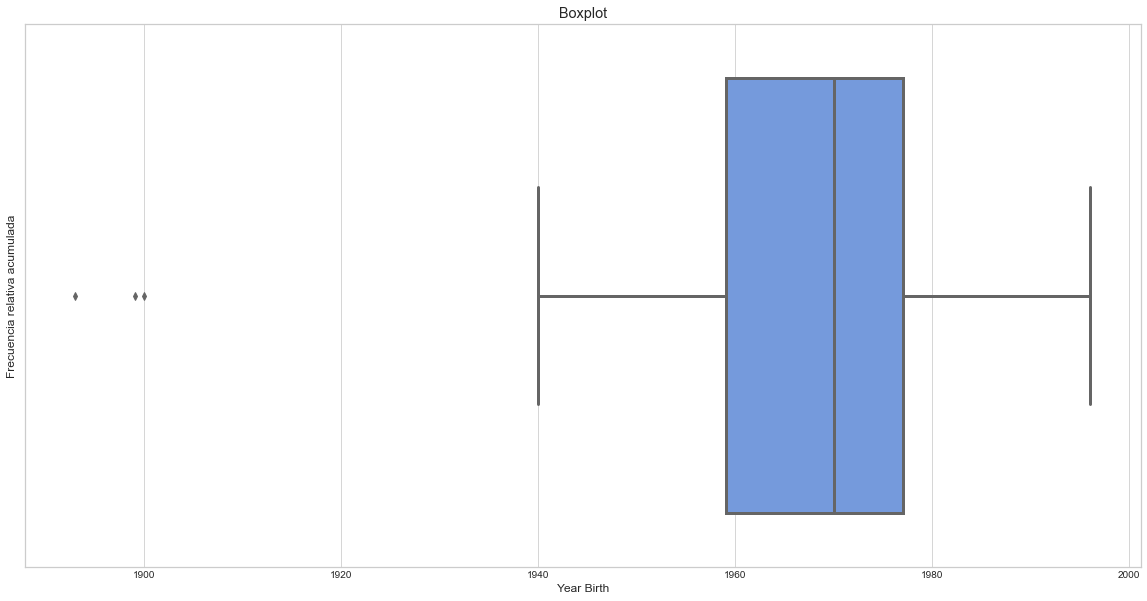

In [12]:
# Boxplot
# Creo boxplot para identificar valores at√≠picos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'year_birth'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'cornflowerblue'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('Year Birth')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribuci√≥n - Boxplot**
- Q1 vale 1958 o menos aprox.
- Q2 vale 1971 o menos aprox.
- Q3 vale 1977 o menos aprox.
- En Q2 se encuentra la mayor densidad de datos.
- Una fecha menor a 1940 se considera un valor extremo.
- En este caso tenemos solo 3 valores at√≠picos.

**Tomaremos los registros con a√±o de nacimiento a partir del 1946 (generaci√≥n Baby Boomers) debido a que a√±os anteriores a este representan clientes mayores de 75 a√±os**

In [13]:
# Tomaremos la variable year_birth como categ√≥rica agrupando los a√±os por Generaciones

#    - Generaci√≥n Silenciosa 1920 - 1940 - Segunda Guerra Mundial 1939 - 1945 -'Silent Generation'
#    - Baby Boomers 1945 - 1964
#    - *Generacion X 1965 - 1980 (1990)
#    - *Generacion Y Millenials 1981 (1991) - 2000
#    - Generacion Z 2001 - 2016
#    - Generacion Alpha 2016 - 2025

# Generar categor√≠a de generaci√≥n 
# No incluimos Generaciones Silenciosa y Z 

limites = [1945, 1964, 1980, 2000]
etiquetas = ['Baby Boomers', 'Generation X', 'Millenials']
pd.cut(x = df['year_birth'], bins = limites, labels = etiquetas)
df['generation'] = pd.cut(x = df['year_birth'], bins = limites, labels = etiquetas)
df.generation.value_counts()

Generation X    1061
Baby Boomers     749
Millenials       380
Name: generation, dtype: int64

In [14]:
# Volvemos a revisar los registros nulos.
df.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                    0
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
response                  0
generation               26
dtype: int64

In [15]:
# filtro1 = df.year_birth < 1946
# df[filtro1]

In [16]:
# filtro = df.generation.isnull()
# df[filtro]

In [17]:
# Eliminar nulos
df.dropna(inplace=True)
df.isnull().sum()

id                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
response                 0
generation               0
dtype: int64

In [18]:
# Crear variable para la edad de nuestros clientes.
current_date = datetime.datetime.now()
date = current_date.date()
df["client_age"] = date.year - df["year_birth"]

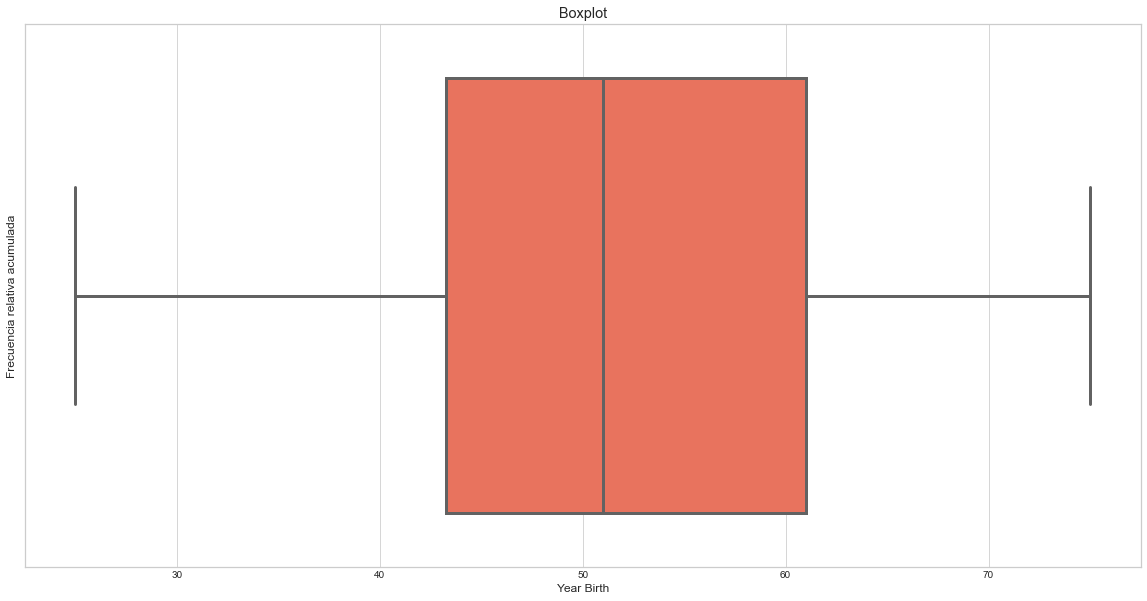

In [19]:
# Boxplot
# Creo boxplot para identificar valores at√≠picos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'client_age'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'tomato'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('Year Birth')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribuci√≥n - Boxplot**
- Q1 vale 44 o menos aprox.
- Q2 vale 52 o menos aprox.
- Q3 vale 62 o menos aprox.
- En Q3 se encuentra la mayor densidad de datos.
- El valor m√°ximo es 75.

In [20]:
# Verificamos los valores de los cuartiles.
df["client_age"].describe()

count    2190.000000
mean       51.818721
std        11.472075
min        25.000000
25%        43.250000
50%        51.000000
75%        61.000000
max        75.000000
Name: client_age, dtype: float64

In [21]:
# Eliminar outliers par la variable "client_age"
# df = remove_outliers(df,"client_age")
# df["client_age"].describe()

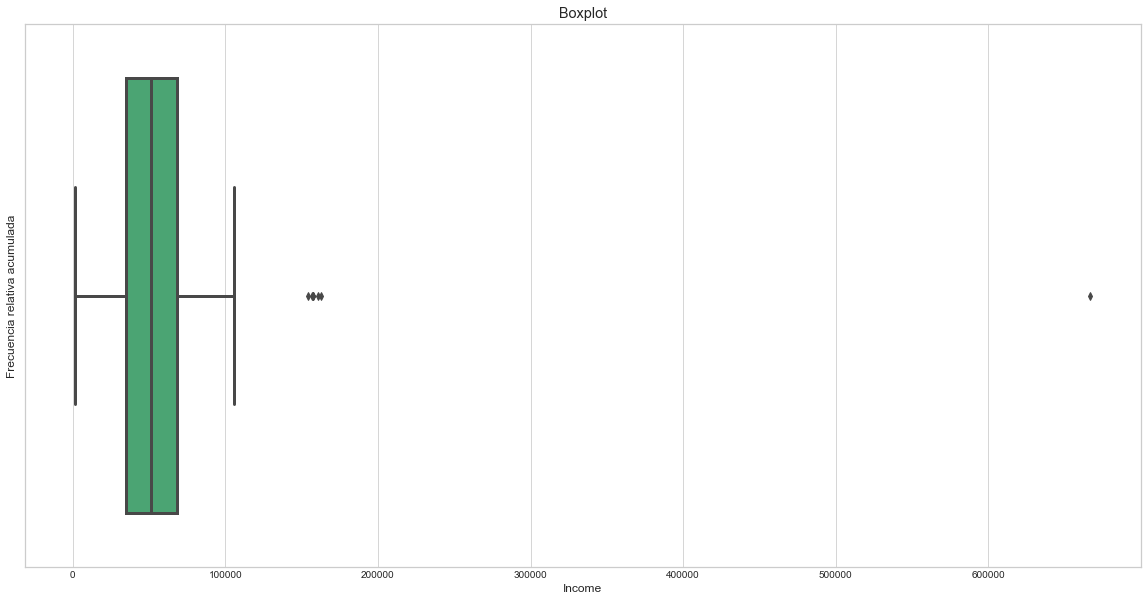

In [22]:
# Boxplot
# Creo boxplot para identificar valores at√≠picos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'income'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'mediumseagreen'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('Income')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribuci√≥n - Boxplot**

- Q1 vale 30,000 o menos aprox.
- Q2 vale 50,000 o menos aprox.
- Q3 vale 65,000 o menos aprox.
- En Q4 se encuentra la mayor densidad de datos.
- Un salario mayor a 110,000 aprox, se considera un valor at√≠pico.
- Vemos un registro con un salario extremo de m√°s de 600,000.

In [23]:
# Verificamos los valores de los cuartiles.
df["income"].describe()

count      2190.000000
mean      52079.040639
std       25209.682533
min        1730.000000
25%       34972.000000
50%       51222.500000
75%       68343.000000
max      666666.000000
Name: income, dtype: float64

In [24]:
#Analizo el gasto en productos de los registros outliers de income.
income = df[df['income']<=150000]['mnt_wines'].sum()
out_income = df[df['income']>150000]['mnt_wines'].sum()

total_income = income + out_income

p_income = (income / total_income) * 100
p_out_income = (out_income / total_income) * 100

print('Gasto de Income    :' + str(income))
print('Gasto de Outliers  :' + str(out_income))

print('Gasto Total        :' + str(total_income))
print('% Gasto de Income  :' + str(p_income))
print('% Gasto de Outliers:' + str(p_out_income))

Gasto de Income    :662224
Gasto de Outliers  :212
Gasto Total        :662436
% Gasto de Income  :99.96799690838058
% Gasto de Outliers:0.03200309161941682


**El gasto en vinos de los "outliers" de income representan solo el % 0.03 del total de compras. Por esta raz√≥n decidimos eliminarlos de nuestro dataset.**

In [25]:
filtro = df.income <= 150000
df[filtro].sort_values(by = 'income', ascending = False).head(1)

id  year_birth   education marital_status    income  kidhome  teenhome  \
646  4611        1970  Graduation       Together  105471.0        0         0   

    dt_customer  recency  mnt_wines  ...  num_web_visits_month  accepted_cmp3  \
646  2013-01-21       36       1009  ...                     3          False   

     accepted_cmp4  accepted_cmp5  accepted_cmp1  accepted_cmp2  complain  \
646          False           True           True          False     False   

     response    generation  client_age  
646      True  Generation X          51  

[1 rows x 29 columns]

In [26]:
filtro = df.income > 150000
df[filtro].sort_values(by = 'income', ascending = True)

id  year_birth   education marital_status    income  kidhome  \
655    5555        1975  Graduation       Divorced  153924.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
1653   4931        1977  Graduation       Together  157146.0        0   
164    8475        1973         PhD        Married  157243.0        0   
1300   5336        1971      Master       Together  157733.0        1   
687    1501        1982         PhD        Married  160803.0        0   
617    1503        1976         PhD       Together  162397.0        1   
2233   9432        1977  Graduation       Together  666666.0        1   

      teenhome dt_customer  recency  mnt_wines  ...  num_web_visits_month  \
655          0  2014-02-07       81          1  ...                     0   
2132         0  2013-08-29       85          2  ...                     0   
1653         0  2013-04-29       13          1  ...                     1   
164          1  2014-03-01       98         20  ...                     0   
1300         0  2013-06-04       37         39  ...                     1   
687          0  2012-08-04       21         55  ...                     0   
617          1  2013-06-03       31         85  ...                     1   
2233         0  2013-06-02       23          9  ...                     6   

      accepted_cmp3  accepted_cmp4  accepted_cmp5  accepted_cmp1  \
655           False          False          False          False   
2132          False          False          False          False   
1653          False          False          False          False   
164           False          False          False          False   
1300          False          False          False          False   
687           False          False          False          False   
617           False          False          False          False   
2233          False          False          False          False   

      accepted_cmp2  complain  response    generation  client_age  
655           False     False     False  Generation X          46  
2132          False     False     False  Baby Boomers          72  
1653          False     False     False  Generation X          44  
164           False     False     False  Generation X          48  
1300          False     False     False  Generation X          50  
687           False     False     False    Millenials          39  
617           False     False     False  Generation X          45  
2233          False     False     False  Generation X          44  

[8 rows x 29 columns]

In [27]:
# Eliminar outliers par la variable "income"
df = remove_outliers(df,"income")
df["income"].describe()

count      2182.000000
mean      51457.499083
std       20693.986979
min        1730.000000
25%       34946.000000
50%       51075.000000
75%       68124.000000
max      105471.000000
Name: income, dtype: float64

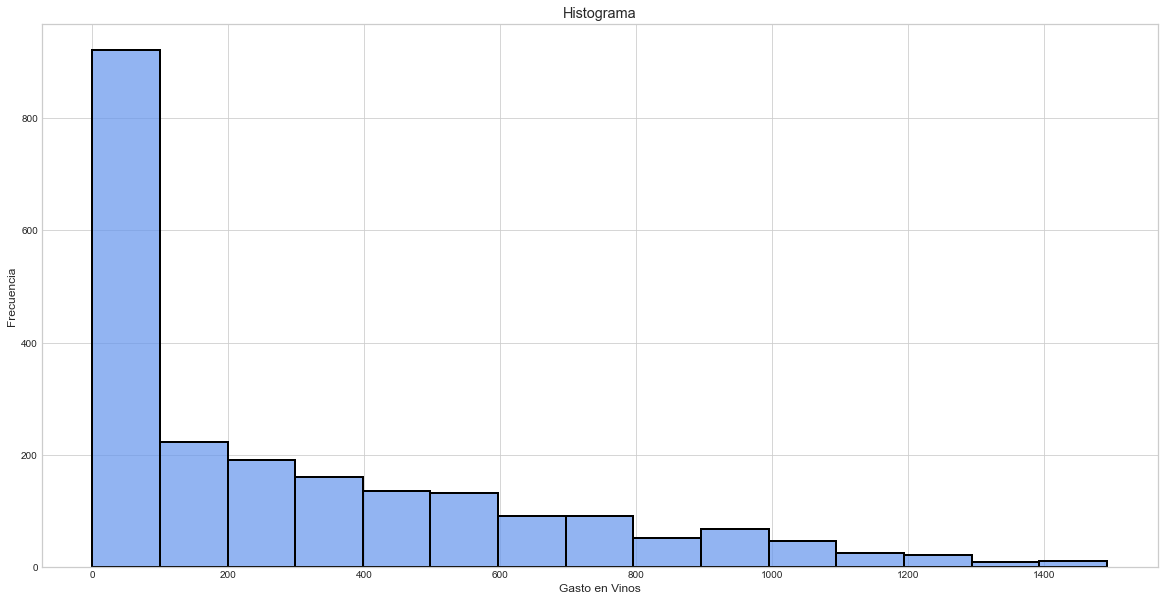

In [28]:
# Exploro la variable mnt_wines de manera general.
# Crea tu "canvas"
fig, ax = plt.subplots(figsize = (20,10))

# Dibuja en tu canvas
_ = sns.histplot(data = df, x = 'mnt_wines',
                bins = 15,
#                 binwidth = 1000,
#                 binrange = (1000,5000), 
                element = 'bars',
                edgecolor = 'black',
                linewidth = 2,
                color = 'cornflowerblue',
                alpha = .7,
#                 kde = True
                ax = ax)

_ = ax.set_title('Histograma')
_ = ax.set_xlabel('Gasto en Vinos')
_ = ax.set_ylabel('Frecuencia')

**Distribuci√≥n - Histograma**

- El importe m√≠nimo es 0 y m√°ximo 1,500 aprox.
- Hay sesgo hacia la derecha (tenemos valores mayores).

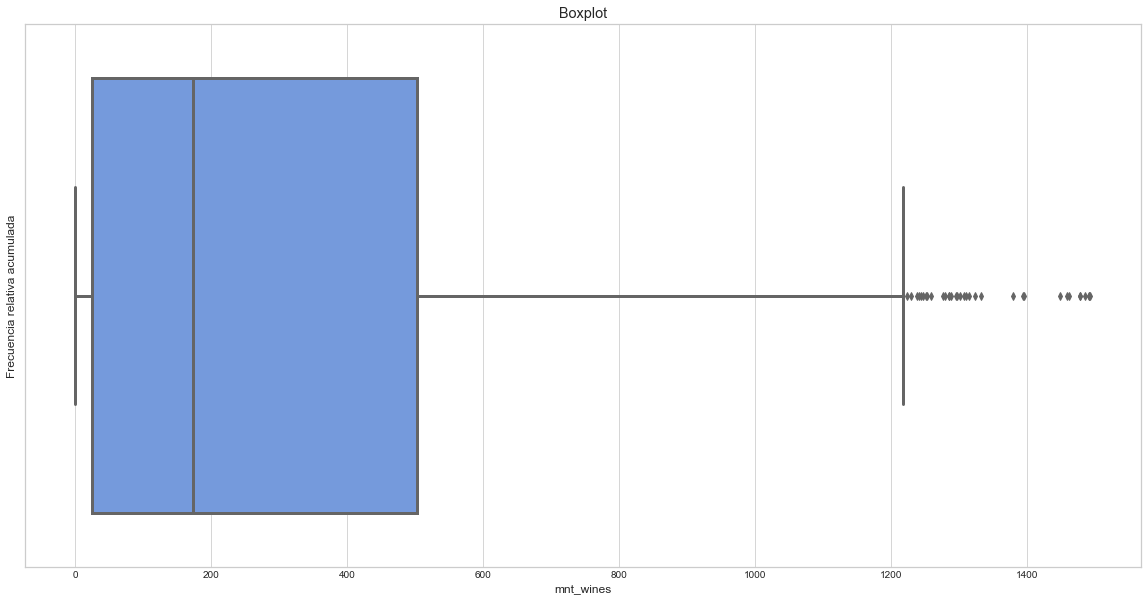

In [29]:
# Boxplot
# Creo boxplot para identificar valores at√≠picos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'mnt_wines'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'cornflowerblue'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('mnt_wines')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribuci√≥n - Boxplot**

- Q1 vale 20 o menos aprox.
- Q2 vale 180 o menos aprox.
- Q3 vale 500 o menos aprox.
- En Q4 se encuentra la mayor densidad de datos.
- Un importe mayor a 1,220 aprox, se considera un valor at√≠pico.
- El valor m√°ximo es de 1,500 aprox.

In [30]:
df["mnt_wines"].describe()

count    2182.000000
mean      303.494042
std       336.230495
min         0.000000
25%        24.000000
50%       173.000000
75%       502.750000
max      1493.000000
Name: mnt_wines, dtype: float64

In [31]:
find_upper_outliers(df,"mnt_wines")

{1224,
 1230,
 1239,
 1241,
 1245,
 1248,
 1252,
 1253,
 1259,
 1276,
 1279,
 1285,
 1288,
 1296,
 1298,
 1302,
 1308,
 1311,
 1315,
 1324,
 1332,
 1379,
 1394,
 1396,
 1449,
 1459,
 1462,
 1478,
 1486,
 1492,
 1493}

In [32]:
 filtro = df.mnt_wines <= 1224
 df[filtro].sort_values(by = 'mnt_wines', ascending = False).head(1)

id  year_birth   education marital_status   income  kidhome  teenhome  \
1115  4356        1971  Graduation       Together  71819.0        0         1   

     dt_customer  recency  mnt_wines  ...  num_web_visits_month  \
1115  2013-08-28       70       1224  ...                     6   

      accepted_cmp3  accepted_cmp4  accepted_cmp5  accepted_cmp1  \
1115          False           True           True          False   

      accepted_cmp2  complain  response    generation  client_age  
1115          False     False     False  Generation X          50  

[1 rows x 29 columns]

In [33]:
#Analizo el gasto en productos de los registros outliers de mnt_wines.
wine = df[df['mnt_wines']<1224]['mnt_wines'].sum()
out_wine = df[df['mnt_wines']>=1224]['mnt_wines'].sum()

total_wine = wine + out_wine

p_wine = (wine / total_wine) * 100
p_out_wine = (out_wine / total_wine) * 100

print('Gasto de Wine      :' + str(wine))
print('Gasto de Outliers  :' + str(out_wine))

print('Gasto Total        :' + str(total_wine))
print('% Gasto de Wine    :' + str(p_wine))
print('% Gasto de Outliers:' + str(p_out_wine))

Gasto de Wine      :616676
Gasto de Outliers  :45548
Gasto Total        :662224
% Gasto de Wine    :93.12196477324893
% Gasto de Outliers:6.87803522675107


**El gasto en vino de los "outliers" drepresentan el %6 del total de compras. Consideramos que es un porcentaje bajo, por esta raz√≥n decidimos eliminarlos de nuestro dataset.**

In [34]:
# Eliminar outliers par la variable "mnt_wines"
df = remove_outliers(df,"mnt_wines")
df["mnt_wines"].describe()

count    2148.000000
mean      287.093110
std       312.148463
min         0.000000
25%        23.000000
50%       168.500000
75%       483.000000
max      1218.000000
Name: mnt_wines, dtype: float64

In [35]:
# Crear variable "children"
df["children"] = df["kidhome"] + df["teenhome"]
df["children"] = df["children"].apply(lambda value: 1 if value != 0 else 0)
#df.children.head(9)

In [36]:
# Crear variable "total_children"
df["total_children"] = df["kidhome"] + df["teenhome"]

In [37]:
# Agregar columna "income_type".
# Separo el income en 3 categor√≠as low, medium y high.

df['income_type'] = df['income'].apply(lambda value: 'low'
                                       if value <= 50000 else 'medium'
                                       if value <= 70000 else 'high')

In [38]:
# Shape final
print(df.shape)

(2148, 32)


## GEDA

In [39]:
# Genero un dataframe de gasto en productos agrupando por tipo de salario y tipo de producto.
df_productos = df.melt(id_vars=['income_type'], value_vars=['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods'], var_name='product_type', value_name='mnt_products')
df_productos.sort_values(by = ['income_type'])

income_type        product_type  mnt_products
6443         high   mnt_meat_products           272
6194         high   mnt_meat_products           689
6193         high   mnt_meat_products           309
6190         high   mnt_meat_products           106
6189         high   mnt_meat_products           818
...           ...                 ...           ...
10164      medium  mnt_sweet_products            19
10165      medium  mnt_sweet_products            19
765        medium           mnt_wines            53
10153      medium  mnt_sweet_products             0
873        medium           mnt_wines            82

[12888 rows x 3 columns]

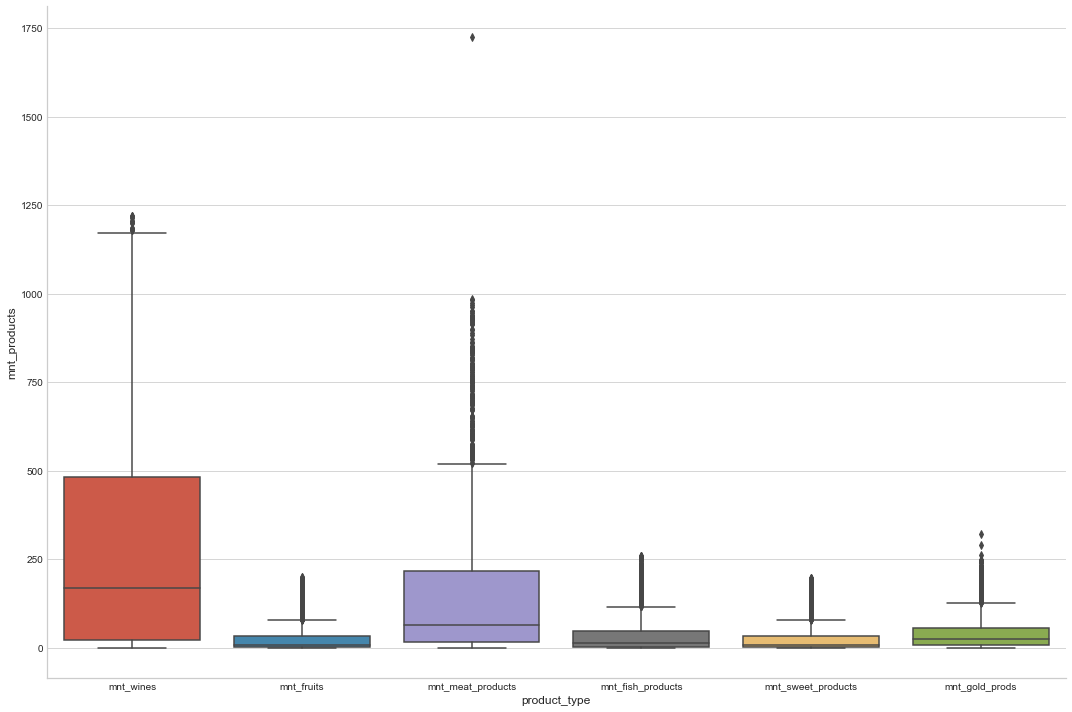

In [40]:
#Gr√°fica de Gasto en Productos
_ = sns.catplot(data = df_productos, x = 'product_type', y = 'mnt_products', kind = 'box',
            #estimator = np.median,
            ci = None,
            height = 10,
            aspect = 1.5,
            )

# sns.stripplot(x = 'product_type', y = 'mnt_products', data = df_productos)

**Aqu√≠ podemos observar que en promedio, los productos que mas compraron nuestros clientes son Vinos seguido de Carnes.**

In [41]:
df.mnt_wines.describe()

count    2148.000000
mean      287.093110
std       312.148463
min         0.000000
25%        23.000000
50%       168.500000
75%       483.000000
max      1218.000000
Name: mnt_wines, dtype: float64

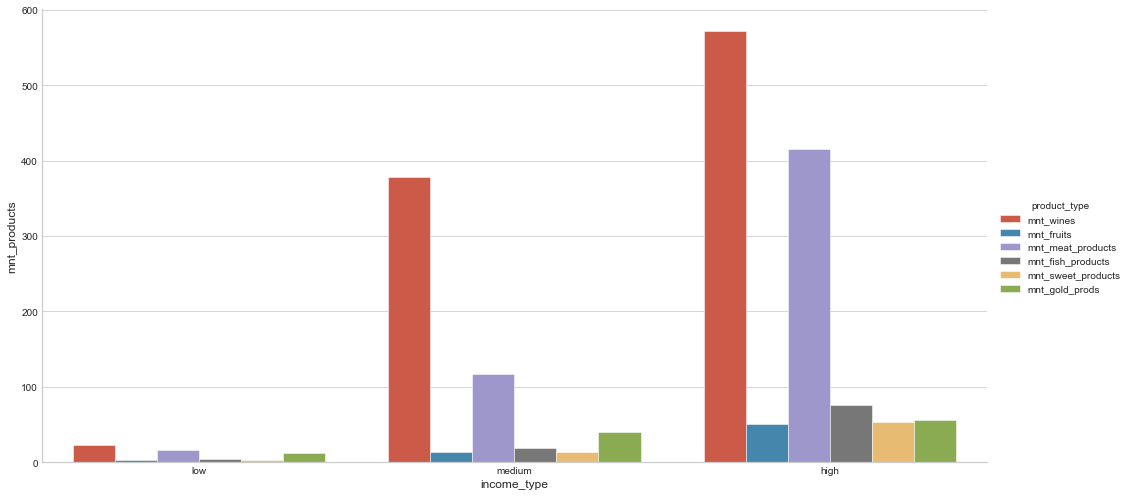

In [42]:
#Gr√°fica de Gasto de Productos por salario
_ = sns.catplot(data = df_productos, x = 'income_type', y = 'mnt_products', kind = 'bar',
            estimator = np.median,
            ci = None,
            height = 7,
            aspect = 2,
            hue = 'product_type'
            )

**Esta gr√°fica nos muestra que en promedio, a mayor ingreso de nuestros clientes, mayor es su gasto en productos.**

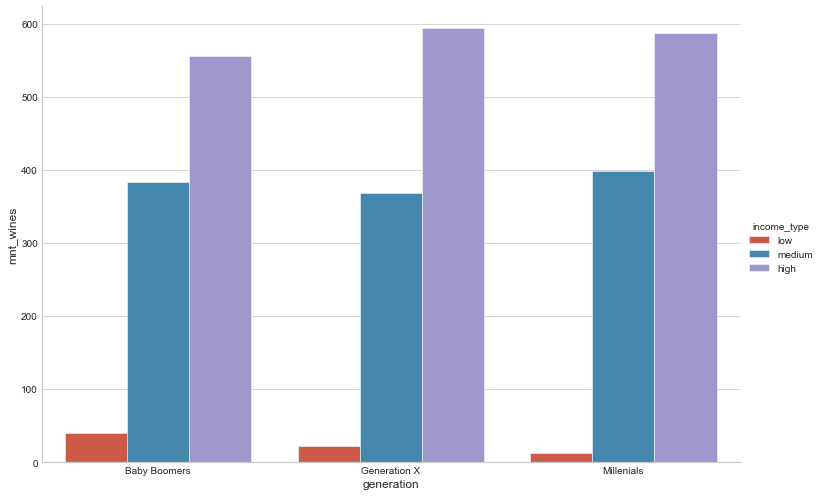

In [43]:
#Gr√°fica Gasto en Vinos por generaci√≥n
_ = sns.catplot(data = df, x = 'generation', y = 'mnt_wines', kind = 'bar',
            estimator = np.median,
            ci = None,
            height = 7,
            aspect = 1.5,       
            hue = 'income_type',
            hue_order=('low', 'medium', 'high')
            )

**Aqu√≠ observamos que en promedio, el gasto en vinos no tiene una variaci√≥n muy significativa si lo analizamos por generaci√≥n(edad) de nuestro cliente.**

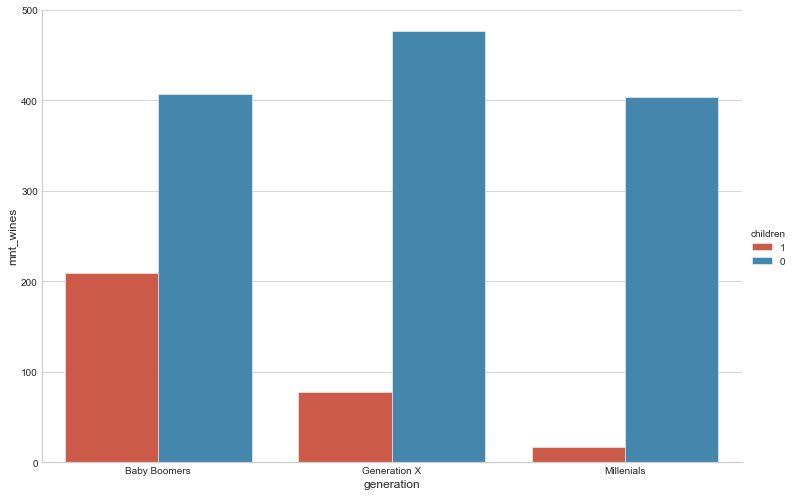

In [44]:
#Gr√°fica Gasto en Vinos por generaci√≥n
_ = sns.catplot(data = df, x = 'generation', y = 'mnt_wines', kind = 'bar',
            estimator = np.median,
            ci = None,
            height = 7,
            aspect = 1.5,       
            hue = 'children',
            hue_order=(1,0)
            )

**Aqu√≠ observamos lo siguientes:**

- En promedio, el gasto en vinos es mayor en clientes sin hijos.

- Para los que SI tienen hijos, en promedio, el gasto en vinos es mayor en clientes de mayor edad.

## Parte 1 - Modelo manual simple

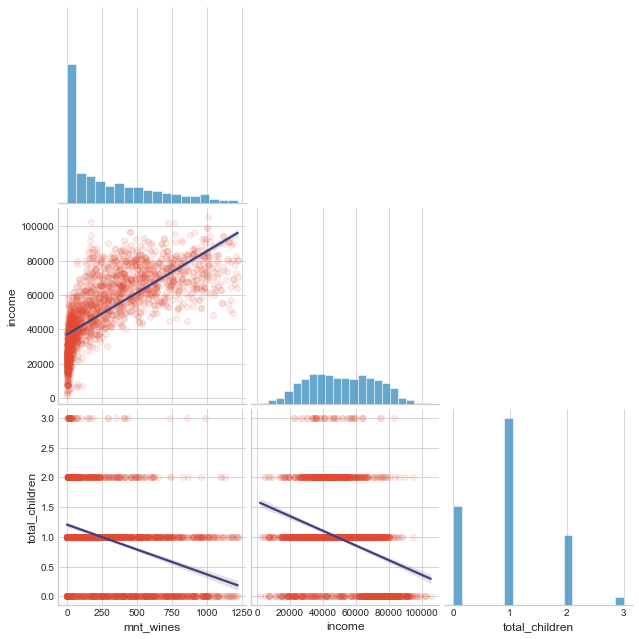

In [45]:
#AM 
# cCrear grafico para variables seleccionadas
# mnt_wines mnt_meat_products | children total_children
cols_traditional_model = ["mnt_wines","income","total_children"]
#cols_traditional_model = ["mnt_meat_products","income","children"]
df_traditional_model = df[cols_traditional_model]
sns.pairplot(data=df_traditional_model,corner=True,kind="reg",plot_kws={"line_kws":{'color':"#40407a"},"scatter_kws":{"alpha":0.1}},height=3);  

Coeficiente de correlaci√≥n de Pearson y p-value (0.7371334647311012, 0.0)


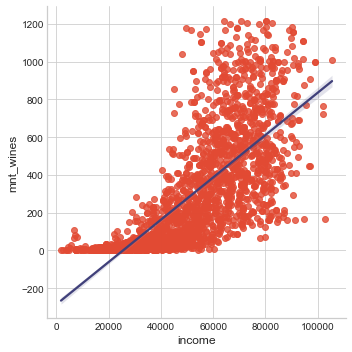

In [46]:
x1 = cols_traditional_model[1]
y = cols_traditional_model[0]
sns.lmplot(x=x1,y=y,data=df,line_kws={"color":"#40407a"})#,height=5);
print("Coeficiente de correlaci√≥n de Pearson y p-value",st.pearsonr(df[x1],df[y]))

Coeficiente de correlaci√≥n de Pearson y p-value (-0.3513639028878198, 1.9265563703894111e-63)


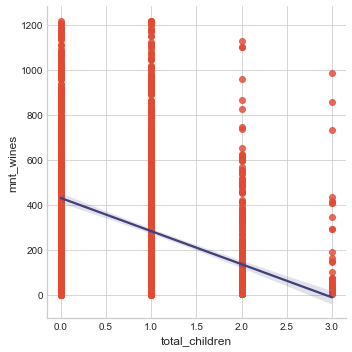

In [47]:
x2 = cols_traditional_model[2]
sns.lmplot(x=x2,y=y,data=df,line_kws={"color":"#40407a"})#,height=5);
print("Coeficiente de correlaci√≥n de Pearson y p-value",st.pearsonr(df[x2],df[y]))

In [48]:
#x3 = cols_traditional_model[3]
#sns.lmplot(x=x3,y=y,data=df,line_kws={"color":"#40407a"})#,height=5);
#print("Coeficiente de correlaci√≥n de Pearson y p-value",st.pearsonr(df[x3],df[y]))

**Coeficiente de correlaci√≥n de Pearson**
+ Grado de linealidad
+ $0$: no hay relaci√≥n lineal
+ $1$: relaci√≥n lineal perfecta
+ $-1$: relaci√≥n lineal inversa perfecta

**p-value**
+ significancia de la linealidad
+ Si $p-value<0.05$, entonces podemos decir que el modelo de regresi√≥n es significativo



=> **Seleccion de variables predictoras(x) y target(y) de acuerdo a EDA**


In [49]:
# Variables predictoras
x = df_traditional_model[cols_traditional_model[1:]]
# Variable target
y = df_traditional_model[cols_traditional_model[0]]

In [50]:
# JBM
# Utilizamos VIF (Variance Inflation Factor) para evaluar la Multicolinearidad
# Multicolinearidad: Se presenta cuando una de las variables de entrada puede obtenerse a partir de otra de las variables de entrada

# Si Coeficiente de Pearson es igual a  1  √≥  ‚àí1 , entonces hay multicolinearidad
# Si  ùëâùêºùêπ>10 , entonces la multicolinearidad es alta
# Lo ideal es que  ùëâùêºùêπ<5

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

income  total_children
vif  1.761523        1.761523


* **Crea un train y un test set**


In [51]:
# Dividimos en conjunto de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (1718, 2)
y_train (1718,)
x_test (430, 2)
y_test (430,)


In [52]:
# El conjunto de entrenamiento lo dividimos en conjunto de entrenamiento y conjunto de validaci√≥n
x_train_final, x_validation, y_train_final, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 3)
print('x_train_final',x_train_final.shape)
print('y_train_final',y_train_final.shape)
print('x_validation',x_validation.shape)
print('y_validation',y_validation.shape)

x_train_final (1374, 2)
y_train_final (1374,)
x_validation (344, 2)
y_validation (344,)


In [53]:
df_manual_model,coef,intercept,model_LR = manual_model(x_train_final,y_train_final,x_validation,y_validation)
df_manual_model

Model                       Columns  r2 Train  \
0        Linear Regression  ['income', 'total_children']  0.543147   
1  Random Forest Regressor  ['income', 'total_children']  0.924173   

   r2 Validate  RMSE Train  RMSE Validate  
0     0.587396  212.196147     194.466722  
1     0.551162   86.449038     202.825818

Modelo simple split
significa que 58% de la variaci√≥n del consumo de vinos/carnes puede explicarse a trav√©s de las variables de entrada que utilizamos

In [54]:
print("Coeficiente: ",coef)
print("Intercepto: ",intercept)

Coeficiente:  [ 1.06140501e-02 -5.55909028e+01]
Intercepto:  -198.75850130051026


Por cada unidad que aumenta cada uno de los tres variables, nuestra compra de vinos aumentara veces cada coeficiente asumiendo que es la unica variable afecta el gasto.

## Parte 2 - Modelo manual estandarizado

In [55]:
#JB
x_scale = StandardScaler().fit_transform(x)

In [56]:
x_scale

array([[-1.13467698,  0.04500415],
       [-1.78326257, -1.29761963],
       [-2.02068426,  0.04500415],
       ...,
       [ 1.41839793,  0.04500415],
       [ 0.95597862, -1.29761963],
       [ 1.41839793,  0.04500415]])

In [57]:
#Otra vez split de los datos: train y test
#NOTA: Las variables num√©ricas ya est√°n estandarizadas
# split de los datos
x_train_m2, x_test_m2, y_train_m2, y_test_m2 = train_test_split(x_scale, y, test_size = 0.3, random_state = 2)
print('x_train:',x_train_m2.shape)
print('y_train:',y_train_m2.shape)
print('x_test:',x_test_m2.shape)
print('y_test:',y_test_m2.shape)

x_train: (1503, 2)
y_train: (1503,)
x_test: (645, 2)
y_test: (645,)


In [58]:
# El conjunto de entrenamiento lo dividimos en conjunto de entrenamiento y conjunto de validaci√≥n
x_train_final_m2, x_validation_m2, y_train_final_m2, y_validation_m2 = train_test_split(x_train_m2, y_train_m2, test_size = 0.2, random_state = 3)
print('x_train_final',x_train_final_m2.shape)
print('y_train_final',y_train_final_m2.shape)
print('x_validation',x_validation_m2.shape)
print('y_validation',y_validation_m2.shape)

x_train_final (1202, 2)
y_train_final (1202,)
x_validation (301, 2)
y_validation (301,)


In [59]:
# De nuevo entrenamos el modelo
# Algoritmo: regresi√≥n lineal
est = LinearRegression()
est.fit(x_scale,y)

LinearRegression()

In [60]:
# intercepto y los coeficientes
print('intercepto:',est.intercept_)
print('coeficiente:',est.coef_)

intercepto: 287.09310986964624
coeficiente: [217.93557008 -35.65359644]


In [61]:
coefficients = pd.DataFrame(index=x.columns,data=est.coef_.T,columns=['Coef.'])
coefficients

Coef.
income          217.935570
total_children  -35.653596

**Importancia de las variables.**
+ Tomamos el valor absoluto de los coeficientes. A mayor valor absoluto, mayor importancia de la variable.
En este caso el orden de importancia es el siguiente:
- income
- total_children
- client_age


In [62]:
# score
train_score_est = est.score(x_train_final_m2, y_train_final_m2)
test_score_est = est.score(x_validation_m2, y_validation_m2)
print('MODELO ESTANDARIZADO \n train score:', train_score_est)
print(' test score:', test_score_est)

MODELO ESTANDARIZADO 
 train score: 0.538300601674764
 test score: 0.5848709207829876


In [63]:
# Coeficiente de determinaci√≥n ajustado
# Se utiliza en regresi√≥n m√∫ltiple
# Siempre ser√° igual o menor que el coeficiente de determinaci√≥n (score)
# Escala al coeficiente de determinaci√≥n dependiendo el n√∫mero de par√°metros
# Se utiliza este coeficiente para obtener una mejor m√©tirca en regresi√≥n lineal
def adj_r2(x,y):
    r2 = est.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [64]:
adj_r2(x_train_m2,y_train_m2)

0.5474049294369285

In [65]:
p2_ms = adj_r2(x_validation_m2,y_validation_m2)
p2_ms

0.5820848195801889

## Parte 3 - Modelo con cross validation

In [66]:
#AM
#Algoritmo: Linear Regression
LR_model_CV = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("LR",LinearRegression())])
print(type(LR_model_CV))
df_p3_mcv = pd.DataFrame()

<class 'sklearn.pipeline.Pipeline'>


In [67]:
# Monitoreando dos metricas o mas
LR = cross_validate(LR_model_CV,x_train,y_train,cv=5,scoring=["r2","neg_root_mean_squared_error"])

In [68]:
df_cv = pd.DataFrame(LR)
df_cv["LR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["LR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]

df_p3_mcv.loc[0,"Model"] = "Linear Regression"
df_p3_mcv.loc[0,"r2"] = df_cv["LR_r2_avg"].max()
df_p3_mcv.loc[0,"RMSE"] = df_cv["LR_RMSE_avg"].min()

df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

fit_time  score_time   test_r2  test_neg_root_mean_squared_error  \
2  0.005168    0.002386  0.547741                       -215.832189   
0  0.007997    0.002694  0.544843                       -215.326153   
4  0.005683    0.002226  0.518928                       -207.256452   
1  0.004469    0.001911  0.587364                       -206.831345   
3  0.005690    0.003797  0.543155                       -199.734894   

   LR_r2_avg  LR_RMSE_avg  
2   0.548406  -208.996207  
0   0.548406  -208.996207  
4   0.548406  -208.996207  
1   0.548406  -208.996207  
3   0.548406  -208.996207

Evaluar el modelo

In [69]:
print("Linear Regression con validacion cruzada\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada

Diferencia de R2:  0.06843576696923692
Diferencia de RMSE:  16.09729426403294


In [70]:
LRS = cross_validate(LR_model_CV,x_train,y_train,scoring=['r2','neg_root_mean_squared_error'], cv=ShuffleSplit(5))

In [71]:
df_cv = pd.DataFrame(LRS)
df_cv["LR_r2_avg_s"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["LR_RMSE_avg_s"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]

df_p3_mcv.loc[1,"Model"] = "Linear Regression (ShuffleSplit)"
df_p3_mcv.loc[1,"r2"] = df_cv["LR_r2_avg_s"].max()
df_p3_mcv.loc[1,"RMSE"] = df_cv["LR_RMSE_avg_s"].min()

df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

fit_time  score_time   test_r2  test_neg_root_mean_squared_error  \
2  0.003767    0.001962  0.503381                       -216.162506   
4  0.004624    0.002673  0.566136                       -210.995737   
0  0.005946    0.002757  0.631382                       -205.956816   
3  0.007696    0.002268  0.554248                       -205.085038   
1  0.004676    0.002624  0.582680                       -199.608040   

   LR_r2_avg_s  LR_RMSE_avg_s  
2     0.567565    -207.561627  
4     0.567565    -207.561627  
0     0.567565    -207.561627  
3     0.567565    -207.561627  
1     0.567565    -207.561627

In [72]:
print("Linear Regression con validacion cruzada con grupos aleatorios\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada con grupos aleatorios

Diferencia de R2:  0.1280007180245083
Diferencia de RMSE:  16.554465993192338


In [73]:
# Algoritmo: Random Forest Regressor
RFR_model_CV = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("RFR",RandomForestRegressor())])
print(type(RFR_model_CV))

<class 'sklearn.pipeline.Pipeline'>


In [74]:
# Monitoreando dos metricas o mas
RFR = cross_validate(RFR_model_CV,x_train,y_train,cv=5,scoring=["r2","neg_root_mean_squared_error"])

In [75]:
df_cv = pd.DataFrame(RFR)
df_cv["RFR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["RFR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]

df_p3_mcv.loc[2,"Model"] = "Random Forest Regressor"
df_p3_mcv.loc[2,"r2"] = df_cv["RFR_r2_avg"].max()
df_p3_mcv.loc[2,"RMSE"] = df_cv["RFR_RMSE_avg"].min()

df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

fit_time  score_time   test_r2  test_neg_root_mean_squared_error  \
2  0.201236    0.014111  0.401098                       -248.370825   
0  0.218764    0.012790  0.465653                       -233.307178   
3  0.201919    0.013778  0.405946                       -227.762735   
4  0.203645    0.013470  0.446233                       -222.365046   
1  0.201200    0.014340  0.552402                       -215.415394   

   RFR_r2_avg  RFR_RMSE_avg  
2    0.454266   -229.444236  
0    0.454266   -229.444236  
3    0.454266   -229.444236  
4    0.454266   -229.444236  
1    0.454266   -229.444236

In [76]:
print("Linear Regression con validacion cruzada\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada

Diferencia de R2:  0.15130407592679618
Diferencia de RMSE:  32.95543163531593


In [77]:
RFR2 = cross_validate(RFR_model_CV,x_train,y_train,scoring=['r2','neg_root_mean_squared_error'], cv=ShuffleSplit(5))

In [78]:
df_cv = pd.DataFrame(RFR2)
df_cv["RFR_r2_avg_s"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["RFR_RMSE_avg_s"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]

df_p3_mcv.loc[3,"Model"] = "Random Forest Regressor (ShuffleSplit)"
df_p3_mcv.loc[3,"r2"] = df_cv["RFR_r2_avg_s"].max()
df_p3_mcv.loc[3,"RMSE"] = df_cv["RFR_RMSE_avg_s"].min()

df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

fit_time  score_time   test_r2  test_neg_root_mean_squared_error  \
2  0.217777    0.011549  0.441191                       -235.057483   
4  0.225861    0.011740  0.381809                       -228.331006   
0  0.253687    0.014647  0.554459                       -225.983826   
1  0.242355    0.013094  0.512562                       -216.754386   
3  0.218829    0.011412  0.548700                       -213.134485   

   RFR_r2_avg_s  RFR_RMSE_avg_s  
2      0.487744     -223.852237  
4      0.487744     -223.852237  
0      0.487744     -223.852237  
1      0.487744     -223.852237  
3      0.487744     -223.852237

In [79]:
print("Linear Regression con validacion cruzada con grupos aleatorios\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada con grupos aleatorios

Diferencia de R2:  0.1726493725340318
Diferencia de RMSE:  21.92299733696882


In [80]:
# Comparando resultados
df_p3_mcv

Model        r2        RMSE
0                       Linear Regression  0.548406 -208.996207
1        Linear Regression (ShuffleSplit)  0.567565 -207.561627
2                 Random Forest Regressor  0.454266 -229.444236
3  Random Forest Regressor (ShuffleSplit)  0.487744 -223.852237

## Parte 4 - Multi-modelo usando validacion cruzada y GridSearchCV

In [81]:
# Algoritmo: LinearRegression
multi_model = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("model",LinearRegression())])
print(type(multi_model))

<class 'sklearn.pipeline.Pipeline'>


In [82]:
multi_model.named_steps["model"]

LinearRegression()

In [83]:
#Algoritmos: Linear Regression, Logistic Regression, KNeighborsRegressor and DecisionTreeRegressor.
param_grid = [{"model":[LinearRegression()],
               "model__fit_intercept":[True,False],
               "model__copy_X":[True]},
              {"model":[RandomForestRegressor()],
               "model__max_depth":[1,2,3,4,5,6],
               "model__max_samples":np.linspace(0.01,1,10),
               "model__bootstrap":[True]},
              {"model":[KNeighborsRegressor()],
               "model__n_neighbors":[1,2,3,4,5,6],
               "model__algorithm":["auto","ball_tree","kd_tree","brute"],
               "model__leaf_size":[30,60,90]},
              {"model":[DecisionTreeRegressor()],
               "model__criterion":["squared_error","absolute_error"],
               "model__splitter":["best","random"],
               "model__max_depth":[1,2,3,4,5,6]}]
# n estimators
# DecisionTreeRegressor min_samples_split

In [84]:
# Instrucciones
grid_search_cv = GridSearchCV(estimator = multi_model,
                  param_grid = param_grid,
                  cv = 5,
                  scoring="neg_root_mean_squared_error")

In [85]:
# Fit
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()],
                          'model__copy_X': [True],
                          'model__fit_intercept': [True, False]},
                         {'model': [RandomForestRegressor(max_depth=3,
                                                          max_samples=0.12)],
                          'model__bootstrap': [True],
                          'model__max_depth': [1, 2, 3, 4, 5, 6],
                          'model__max_samples': ar...
                         {'model': [KNeighborsRegressor()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__leaf_size': [30, 60, 90],
                          'model__n_neighbors': [1, 2, 3, 4, 5, 6]},
                  

In [86]:
# Revisar tipo de objecto
type(grid_search_cv)

sklearn.model_selection._search.GridSearchCV

In [87]:
results = pd.DataFrame(grid_search_cv.cv_results_).sort_values(by='rank_test_score')
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
23        0.114914      0.038549         0.010090        0.001236   
25        0.119939      0.012026         0.010121        0.001189   
34        0.132444      0.030438         0.011049        0.002592   
35        0.149805      0.045347         0.010571        0.000827   
33        0.130545      0.043764         0.011638        0.003324   
..             ...           ...              ...             ...   
68        0.003142      0.000424         0.002470        0.000337   
86        0.003159      0.000334         0.002855        0.000589   
137       0.003203      0.000283         0.001613        0.000436   
147       0.008851      0.001252         0.001621        0.000168   
1         0.004153      0.001250         0.001704        0.000404   

                                           param_model param_model__copy_X  \
23   RandomForestRegressor(max_depth=3, max_samples...                 NaN   
25   RandomForestRegressor(max_depth=3, max_samples...                 NaN   
34   RandomForestRegressor(max_depth=3, max_samples...                 NaN   
35   RandomForestRegressor(max_depth=3, max_samples...                 NaN   
33   RandomForestRegressor(max_depth=3, max_samples...                 NaN   
..                                                 ...                 ...   
68                               KNeighborsRegressor()                 NaN   
86                               KNeighborsRegressor()                 NaN   
137                            DecisionTreeRegressor()                 NaN   
147                            DecisionTreeRegressor()                 NaN   
1                                   LinearRegression()                True   

    param_model__fit_intercept param_model__bootstrap param_model__max_depth  \
23                         NaN                   True                      3   
25                         NaN                   True                      3   
34                         NaN                   True                      4   
35                         NaN                   True                      4   
33                         NaN                   True                      4   
..                         ...                    ...                    ...   
68                         NaN                    NaN                    NaN   
86                         NaN                    NaN                    NaN   
137                        NaN                    NaN                      2   
147                        NaN                    NaN                      1   
1                        False                    NaN                    NaN   

    param_model__max_samples  ... param_model__splitter  \
23                      0.12  ...                   NaN   
25                      0.34  ...                   NaN   
34                      0.23  ...                   NaN   
35                      0.34  ...                   NaN   
33                      0.12  ...                   NaN   
..                       ...  ...                   ...   
68                       NaN  ...                   NaN   
86                       NaN  ...                   NaN   
137                      NaN  ...                random   
147                      NaN  ...                random   
1                        NaN  ...                   NaN   

                                                params split0_test_score  \
23   {'model': RandomForestRegressor(max_depth=3, m...       -206.739137   
25   {'model': RandomForestRegressor(max_depth=3, m...       -209.453079   
34   {'model': RandomForestRegressor(max_depth=3, m...       -208.100111   
35   {'model': RandomForestRegressor(max_depth=3, m...       -208.778291   
33   {'model': RandomForestRegressor(max_depth=3, m...       -208.942957   
..                                                 ...               ...   
68   {'model': KNeighborsRegressor(),

In [88]:
# Mejor RMSE
p4_mm_rmse = grid_search_cv.best_score_
p4_mm_rmse

-202.01142368821013

In [89]:
# Parametro con los que se obtuvo el mejor RMSE
grid_search_cv.best_params_

{'model': RandomForestRegressor(max_depth=3, max_samples=0.12),
 'model__bootstrap': True,
 'model__max_depth': 3,
 'model__max_samples': 0.12}

Re-entrenar el modelo

In [90]:
# Mejor modelo con parametros
grid_search_cv.best_estimator_

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=3, max_samples=0.12))])

In [91]:
# Re-entrenar el modelo con los mejores par√°metros
## Hacer validacion cruzada
#cross_val_score(grid_search_cv,x_train,y_train, scoring="neg_root_mean_squared_error", cv=5)
grid_search_cv.fit(x_train,y_train);

Predicciones

In [92]:
# Calcular predicciones
y_pred = grid_search_cv.predict(x_test)

In [93]:
# Crear variables para comparar resultados finales 
x_test["y_test"] = y_test
x_test["y_pred"] = y_pred
x_test["residuals"] = x_test["y_test"] - x_test["y_pred"] # Calcular residuos
x_test["abs_percent"] = (round(x_test["residuals"]/x_test["y_test"],6)*100).abs()

In [94]:
# Comparacion final de resultados
compare_cols = ["income","y_test","y_pred","residuals","abs_percent"]
compare = x_test[compare_cols]
# Ascendente
compare.sort_values(by=["abs_percent"],ascending=True).head(60)

income  y_test      y_pred  residuals  abs_percent
773   33622.0      39   39.188628  -0.188628       0.4837
1899  59292.0     378  375.843170   2.156830       0.5706
603   61467.0     410  407.596734   2.403266       0.5862
394   70777.0     554  550.633751   3.366249       0.6076
1269  85485.0     630  625.110195   4.889805       0.7762
362   28442.0      19   18.792355   0.207645       1.0929
698   45938.0     273  268.990298   4.009702       1.4688
691   61209.0     466  459.010310   6.989690       1.4999
1606  71855.0     548  557.267298  -9.267298       1.6911
1870  26642.0      13   13.221308  -0.221308       1.7024
2057  70179.0     532  542.408616 -10.408616       1.9565
1559  70179.0     532  542.408616 -10.408616       1.9565
1311  64857.0     556  544.328534  11.671466       2.0992
850   49166.0     224  219.026514   4.973486       2.2203
1485  70379.0     553  540.710997  12.289003       2.2222
186   32303.0      35   35.810638  -0.810638       2.3161
2006  63684.0     575  559.672824  15.327176       2.6656
859   85710.0     600  625.110195 -25.110195       4.1850
1298  78569.0     558  582.359118 -24.359118       4.3654
1729  71107.0     533  557.290536 -24.290536       4.5573
2187  84117.0     611  639.028331 -28.028331       4.5873
1854  82733.0     712  673.310260  38.689740       5.4340
1778  39435.0      71   66.998002   4.001998       5.6366
1212  77044.0     625  587.044357  37.955643       6.0729
2166  72071.0     531  564.983468 -33.983468       6.3999
1814  72071.0     531  564.983468 -33.983468       6.3999
70    66991.0     496  528.247785 -32.247785       6.5016
434   30015.0      25   26.627132  -1.627132       6.5085
315   28839.0      24   25.646263  -1.646263       6.8594
234   62745.0     562  519.278361  42.721639       7.6017
143   68352.0     614  565.881083  48.118917       7.8370
1429  31907.0      33   35.731818  -2.731818       8.2782
29    84618.0     684  626.159053  57.840947       8.4563
1657  62670.0     539  492.251343  46.748657       8.6732
2114  45736.0     188  171.072412  16.927588       9.0040
365   54803.0     404  366.613503  37.386497       9.2541
279   63841.0     635  573.365935  61.634065       9.7062
1694  18222.0      12   10.800717   1.199283       9.9940
51    79143.0     650  582.957450  67.042550      10.3142
1968  72643.0     526  582.107955 -56.107955      10.6669
871   62450.0     515  459.662322  55.337678      10.7452
5     62513.0     520  462.408913  57.591087      11.0752
1110  76773.0     516  573.524619 -57.524619      11.1482
1692  18169.0       9   10.013549  -1.013549      11.2617
1406  47352.0     172  191.377056 -19.377056      11.2657
1020  34961.0      45   50.099900  -5.099900      11.3331
967   33471.0      43   37.974380   5.025620      11.6875
281   51369.0     297  261.828737  35.171263      11.8422
226   51369.0     297  261.828737  35.171263      11.8422
704   41335.0     112   98.360696  13.639304      12.1780
1686  78789.0     667  584.857615  82.142385      12.3152
997   26091.0      15   13.140447   1.859553      12.3970
2190  89616.0     671  755.935895 -84.935895      12.6581
2048  76467.0     676  589.980041  86.019959      12.7248
662   58330.0     445  387.173748  57.826252      12.9947
852   82347.0     556  628.282299 -72.282299      13.0004
1728  74881.0     505  571.481442 -66.481442      13.1646
836   49494.0     191  216.167114 -25.167114      13.1765
2020  28587.0      22   18.960181   3.039819      13.8174
759   38829.0      76   64.616991  11.383009      14.9776

In [95]:
# Descendente
compare.sort_values(by=["abs_percent"],ascending=False).head(60)

income  y_test      y_pred   residuals  abs_percent
893   26868.0       0   13.853664  -13.853664          inf
136    9548.0       0   10.013549  -10.013549          inf
445   23295.0       0   12.034575  -12.034575          inf
233   15033.0       0   10.800717  -10.800717          inf
618   54162.0       5  233.884078 -228.884078    4577.6816
75    40246.0       2   76.675274  -74.675274    3733.7637
783   30467.0       1   38.250268  -37.250268    3725.0268
471   37406.0       2   54.565473  -52.565473    2628.2737
178   38285.0       2   51.599707  -49.599707    2479.9853
2016  36790.0       3   68.372500  -65.372500    2179.0833
1088  43776.0       8  166.976320 -158.976320    1987.2040
1112  54466.0      12  250.273270 -238.273270    1985.6106
1412  43142.0       5   98.235166  -93.235166    1864.7033
1427  43269.0      10  164.957774 -154.957774    1549.5777
1867  34738.0       3   49.320837  -46.320837    1544.0279
321   34421.0       3   48.316532  -45.316532    1510.5511
1847  30093.0       2   29.510564  -27.510564    1375.5282
719   45160.0       8  108.082152 -100.082152    1251.0269
425   48686.0      10  134.821931 -124.821931    1248.2193
65    25721.0       1   12.470663  -11.470663    1147.0663
2182  42523.0      14  170.625453 -156.625453    1118.7532
980   46779.0      12  142.790122 -130.790122    1089.9177
1645  39228.0       7   74.734978  -67.734978     967.6425
19    33812.0       4   41.823408  -37.823408     945.5852
748   33697.0       4   40.550918  -36.550918     913.7730
1220   8940.0       1   10.013549   -9.013549     901.3549
2129  33590.0       4   38.747939  -34.747939     868.6985
1587  61482.0      48  461.544208 -413.544208     861.5504
2100  53204.0      29  230.883496 -201.883496     696.1500
501   48330.0      28  213.296401 -185.296401     661.7729
1804  44689.0      18  127.285009 -109.285009     607.1389
882   36627.0       9   54.599336  -45.599336     506.6593
833   25130.0       2   11.936251   -9.936251     496.8125
259   40737.0      11   65.156030  -54.156030     492.3275
1935  34984.0       8   46.428139  -38.428139     480.3517
1344  24367.0       2   11.446608   -9.446608     472.3304
220   45204.0      30  170.616808 -140.616808     468.7227
1247  40521.0      12   67.284533  -55.284533     460.7044
693   13084.0       2   10.800717   -8.800717     440.0358
165   43482.0      18   96.386158  -78.386158     435.4787
95    30096.0       5   26.627132  -21.627132     432.5426
421   30096.0       5   26.627132  -21.627132     432.5426
1193  62307.0      87  459.645589 -372.645589     428.3283
464   33183.0       7   36.860442  -29.860442     426.5777
1851  22280.0       2   10.276871   -8.276871     413.8435
1962  44359.0      20  101.029068  -81.029068     405.1453
2137  20587.0       2   10.050771   -8.050771     402.5386
1463  16531.0       2   10.013549   -8.013549     400.6774
45    79941.0     123  594.590326 -471.590326     383.4068
1515  51766.0      60  275.701626 -215.701626     359.5027
2167  91172.0     162  739.450228 -577.450228     356.4508
384   36143.0      12   53.743293  -41.743293     347.8608
130   62998.0     120  533.240906 -413.240906     344.3674
569   38200.0      12   53.041650  -41.041650     342.0138
1232  41986.0      27  117.852250  -90.852250     336.4898
760   35523.0      11   47.409115  -36.409115     330.9920
1987  51373.0      83  348.447796 -265.447796     319.8166
1369  67267.0     134  540.466719 -406.466719     303.3334
816   30772.0       7   28.043312  -21.043312     300.6187
947   68274.0     135  535.891407 -400.891407     296.9566

In [96]:
# JBM
# Residuos
residuos = y_test - y_pred

In [97]:
residuos.abs().mean()

136.95152029263465

Text(0, 0.5, 'residuos')

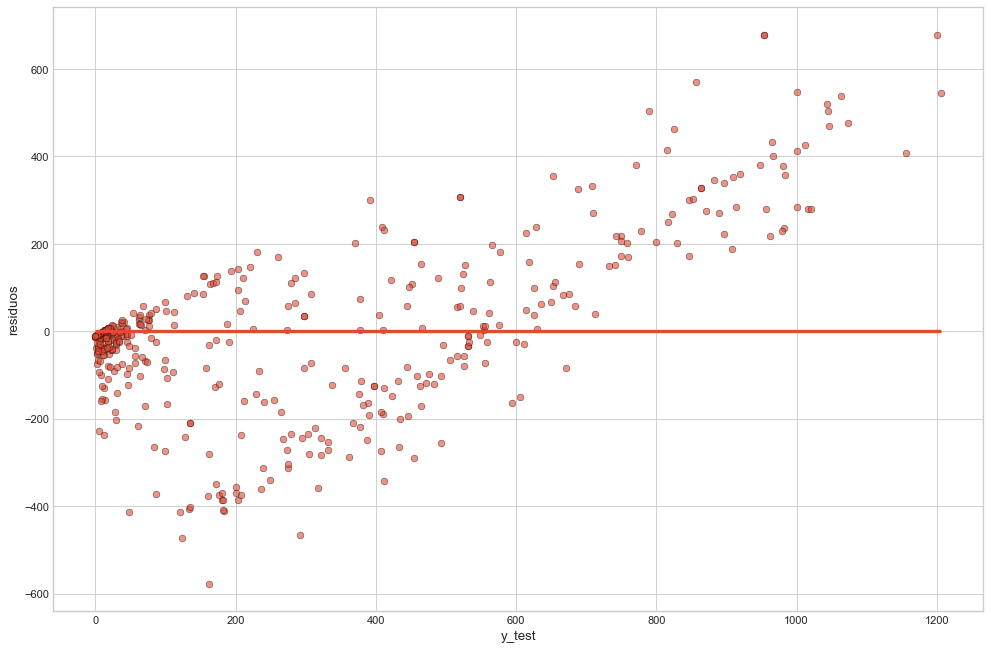

In [98]:
# Visualizamos si se cumple la Homocedasticidad con los residuos del modelo. 
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(y_test,residuos,alpha=.6,edgecolor="k")
plt.hlines(0,y_test.min(),y_test.max(),lw=3)
plt.xlabel('y_test')
plt.ylabel('residuos')

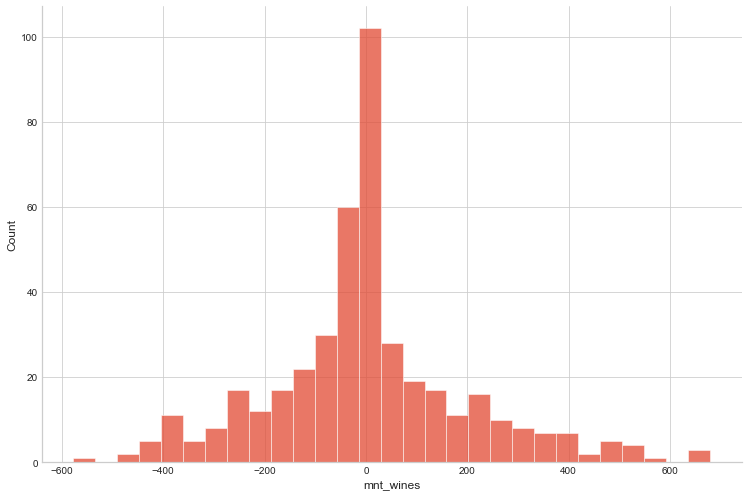

In [99]:
# Homocedasticidad : La varianza de los residuos es constante
# Prueba: Scatter plot de los residuos
# ¬øy si no se cumple?:  El modelo no esta generalizando bien
# Soluci√≥n:  Probar transformaciones --> log por ejemplo

# Distribuci√≥n de los residuos para identificar si es una distribuci√≥n Normal
sns.displot(residuos,kde=False,height=7,aspect=1.5);

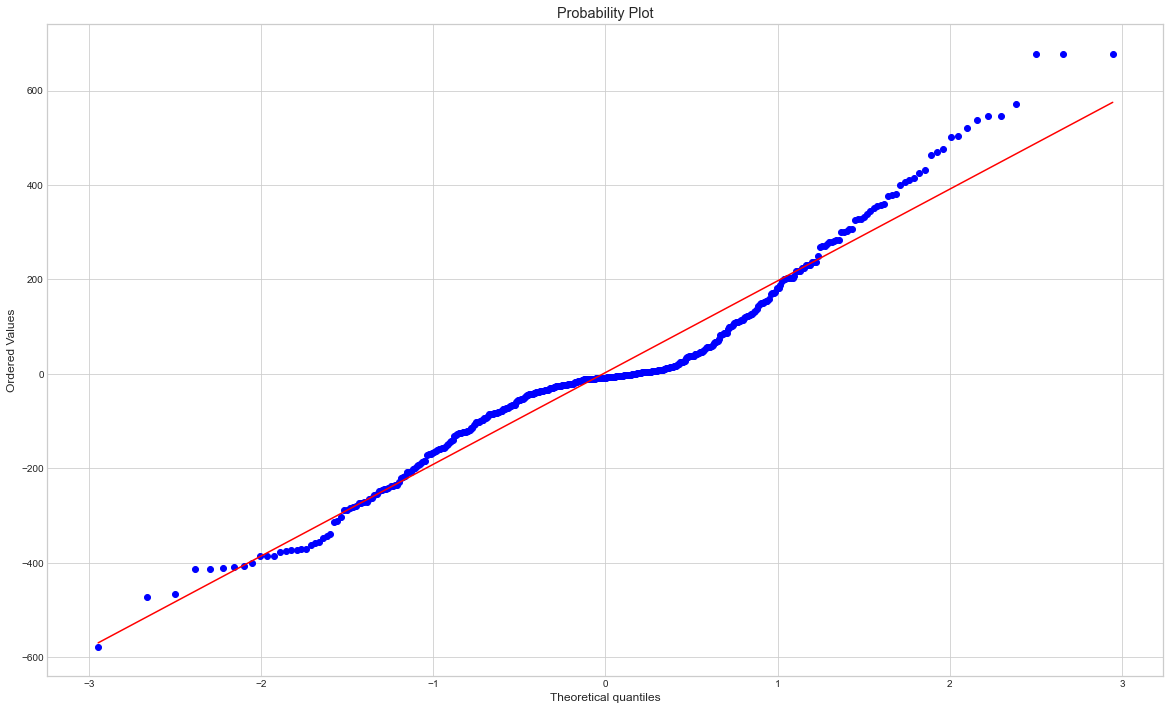

In [100]:
# Normalidad de residuos: Los residuos tienen una distribuci√≥n normal
# Prueba: QQ-Plot, histograma o Kolmogorov test
# ¬øy si no se cumple?: El modelo no esta generalizando bien
# Soluci√≥n: Probar transformaciones: log por ejemplo

# Q-Q plots
# Si los residuos tuvieran una distribuci√≥n normal, entonces la mayor√≠a de los puntos azules estar√≠an sobre la l√≠nea roja.

fig, ax = plt.subplots(figsize = (20,12))
st.probplot(residuos,plot=ax,fit=True)
plt.show()

In [101]:
p4_mm_r2 = metrics.r2_score(y_test,y_pred)
p4_mm_r2

0.602104373008574

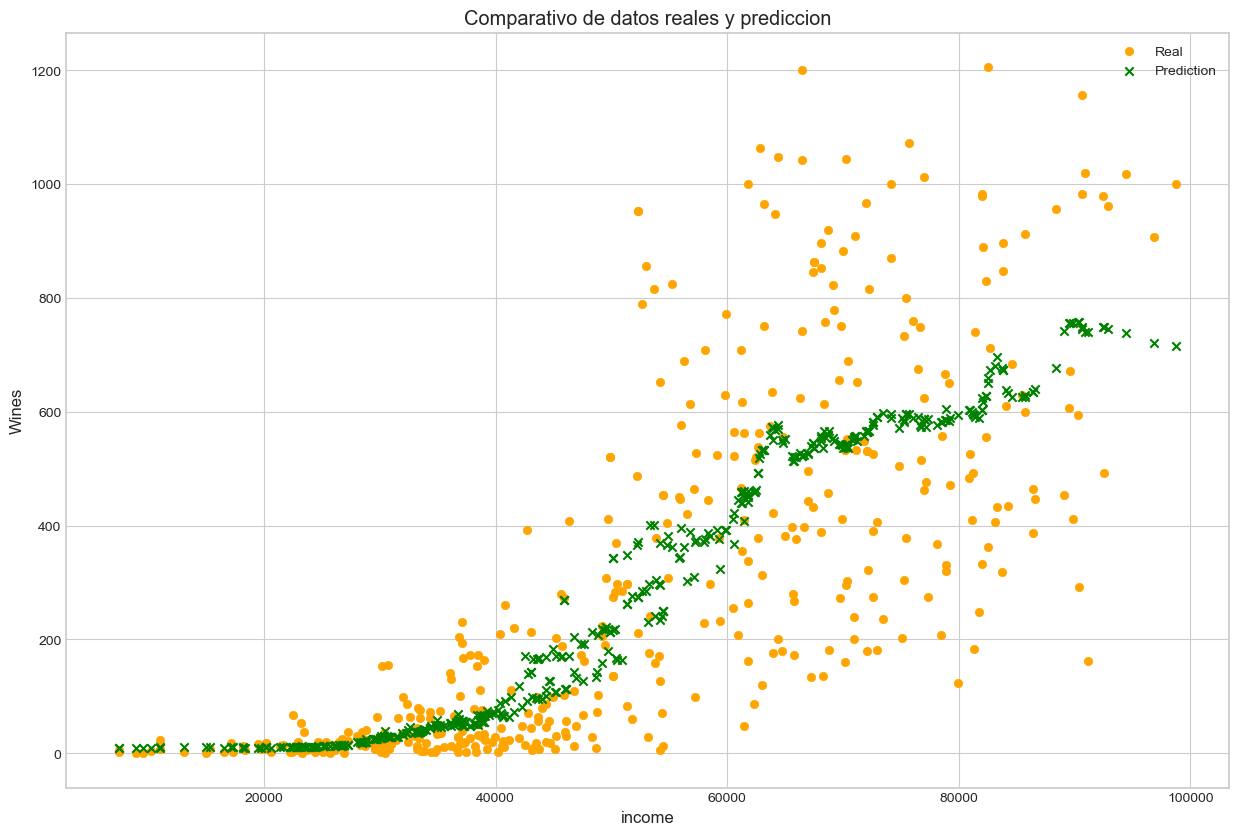

In [102]:
# Comparar valores reales contra predicciones
# Plot
plt.rcParams.update({"figure.figsize":(15,10),"figure.dpi":100})
plt.scatter(compare["income"],compare["y_test"],color="orange",marker="o",label="Real")
plt.scatter(compare["income"],compare["y_pred"],color="green",marker="x",label="Prediction")
# Labels
plt.title("Comparativo de datos reales y prediccion")
plt.xlabel("income")
plt.ylabel('Wines')
plt.legend(loc='best')
plt.show()

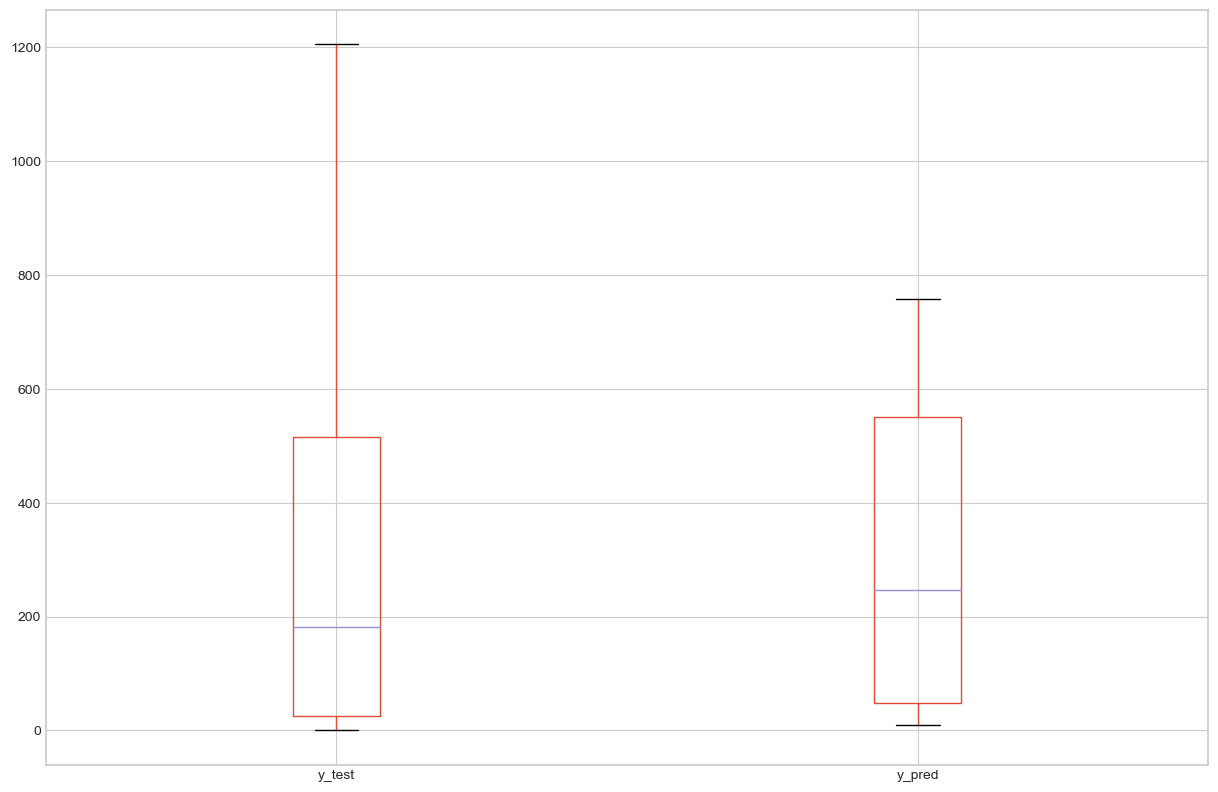

In [103]:
# Boxplot
compare.boxplot(column=["y_test","y_pred"]);

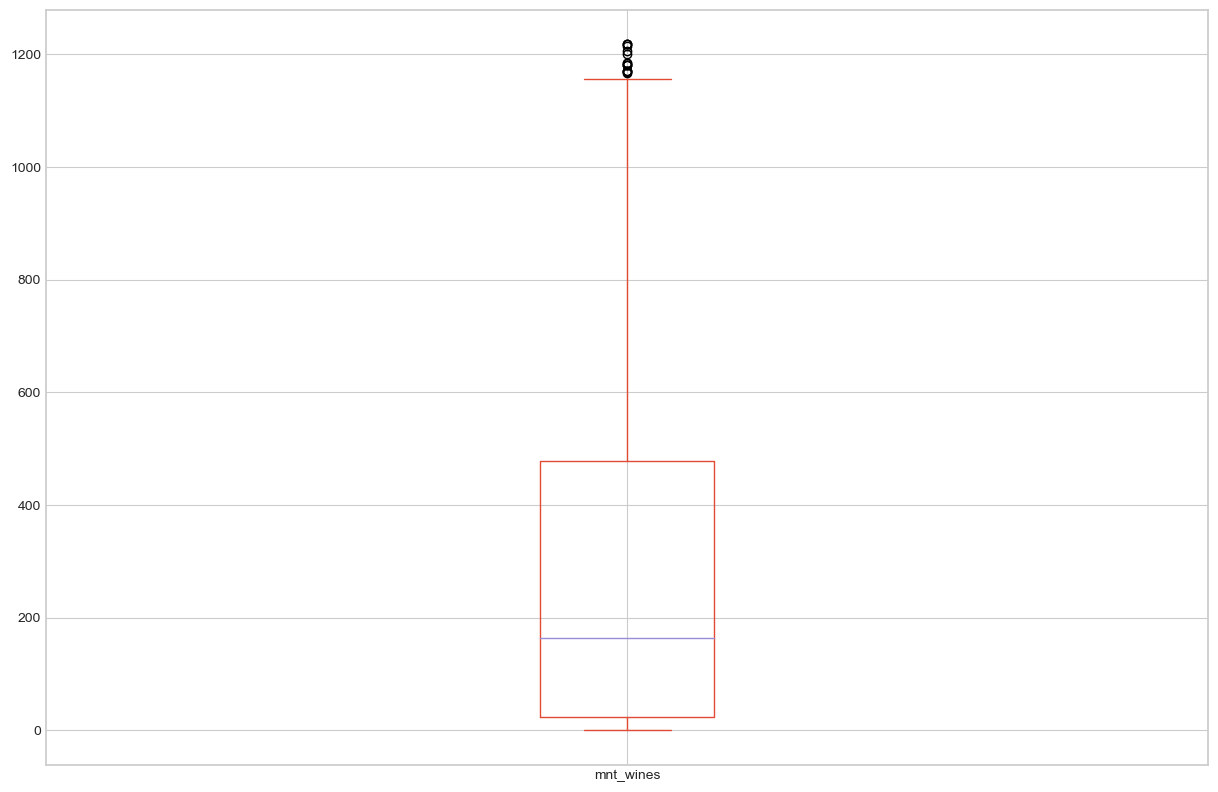

In [104]:
y_train.plot.box();

In [105]:
# Conclusion: Comparando r2 y RMSE
print("Parte 1 - Modelo manual simple:",get_record(df_manual_model[["r2 Validate","RMSE Validate"]],0))
print("Parte 2 - Modelo manual estandarizado:",p2_ms)
print("Parte 3 - Modelo con cross validation:",df_p3_mcv["r2"].max(),df_p3_mcv["RMSE"].abs().min())    
print("Parte 4 - Multi-modelo GridSearchCV:",p4_mm_r2,p4_mm_rmse)

Parte 1 - Modelo manual simple: r2 Validate        0.587396
RMSE Validate    194.466722
Name: 0, dtype: float64
Parte 2 - Modelo manual estandarizado: 0.5820848195801889
Parte 3 - Modelo con cross validation: 0.5675653896185031 207.5616272557339
Parte 4 - Multi-modelo GridSearchCV: 0.602104373008574 -202.01142368821013
